# Виконання

## Завдання перше

### Для початку імпортуємо модулі pandas, numpy, seaborn та matplotlib. Завантажимо датафрейм та виведемо його вміст.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/adult.csv')
columns = [
    "age", "workclass", "fnlwgt",
    "education", "educational_num",
    "marital_status", "occupation",
    "relationship", "race", "gender",
    "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"]
df.columns = columns
df

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


*Сутності*

### Замінимо пусті значення в категоріальних колонках на ті, що найчастіше зустрічаються. Перетворимо категоріальні змінні у числові за допомогою класу LabelEncoder з модуля sklearn.preprocessing.

In [58]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
for c in categorical:
    df[c].replace('?', np.NaN, inplace=True)
    df[c].fillna(df[c].mode()[0], inplace=True)
    df[c] = LabelEncoder().fit_transform(df[c])
df

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,<=50K
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,>50K
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,<=50K
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,<=50K


*Заміна пустих значень та перетворення категоріальних змінних в числові*

### Розділимо данні на тестові та навчальні.

In [59]:
X = df.drop(['income'], axis=1)
y = df['income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

*Розділення на тестові та навчальні данні*

### Закодуємо категоріальні колонки за допомогою one-hot encoding.

In [60]:
import category_encoders as ce
categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
encoder = ce.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

*Закодовування*

### Масштабуємо значення

In [61]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
0,-0.25,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Масштабування данних*

### Тренування моделі

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

*Тренування моделі*

### Прогнозування результатів

In [63]:
y_pred = gnb.predict(X_test)
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

*Результати*

### Перевіримо точність

In [64]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8062


*Точність*

### Перевірка на оверфітинг та андерфітинг.

In [65]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training-set accuracy score: 0.8021
Training set score: 0.8021
Test set score: 0.8062


*Перевірка на оверфітинг та андерфітинг*

### Перевірка з нульовою точністю

In [66]:
dd = y_test.value_counts()
print(dd)
null_accuracy = dd[0] / (dd[0] + dd[1])
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

income
 <=50K    7454
 >50K     2314
Name: count, dtype: int64
Null accuracy score: 0.7631


/tmp/ipykernel_4735/1418140793.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  null_accuracy = dd[0] / (dd[0] + dd[1])


*Перевірка з нульовою точністю*

### Матриця невідповідностей

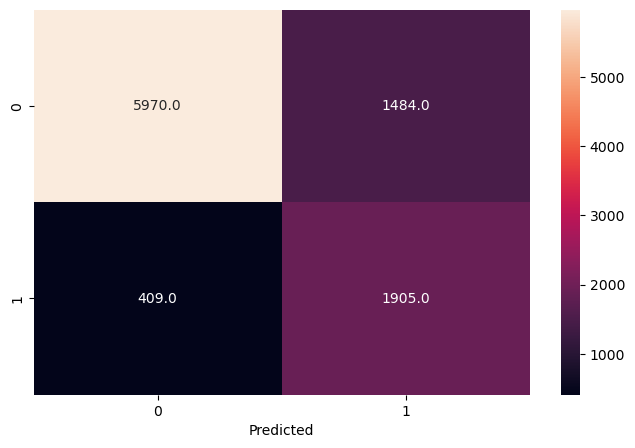

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def conf_mat(model, x_test, y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt=".1f")
    plt.xlabel('Predicted')
conf_mat(gnb, X_test, y_test)

*Матриця невідповідностей*

### Визначимо метрики класифікації

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.86      7454
        >50K       0.56      0.82      0.67      2314

    accuracy                           0.81      9768
   macro avg       0.75      0.81      0.77      9768
weighted avg       0.85      0.81      0.82      9768



*Метрики класифікації*

### І в кінці побудуємо матрицю кореляцій.

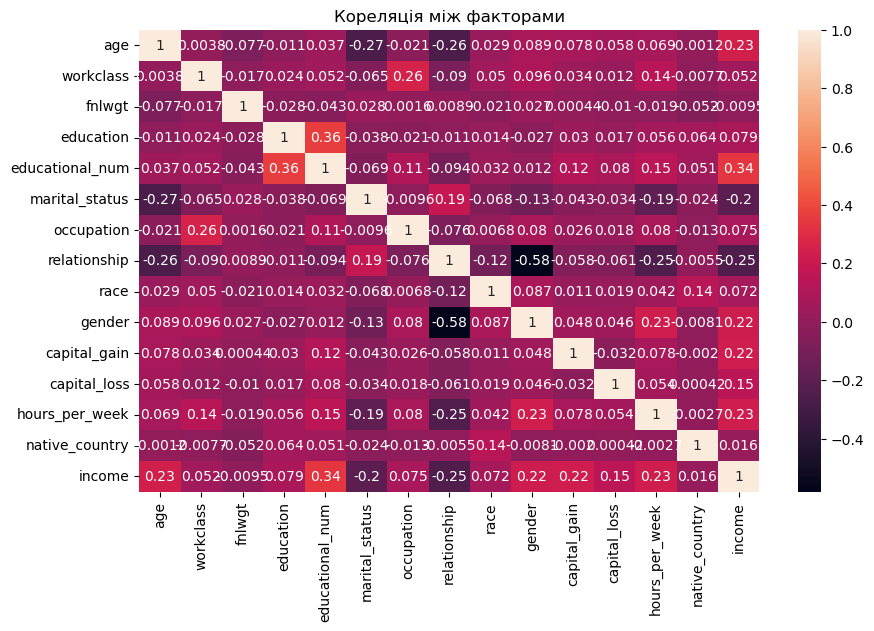

In [71]:
categorical = ['income']
for c in categorical:
    df[c].replace('?', np.NaN, inplace=True)
    df[c].fillna(df[c].mode()[0], inplace=True)
    df[c] = LabelEncoder().fit_transform(df[c])

def corr_map(df, figsize):
    fig, axis = plt.subplots(figsize=figsize)
    axis.set_title('Кореляція між факторами')
    sns.heatmap(df.corr(), ax=axis, annot=True)
corr_map(df, (10, 6))

*Матриця кореляцій*

### Візуалізуємо спрогнозовані класи відносно рівня освіченості та віку.

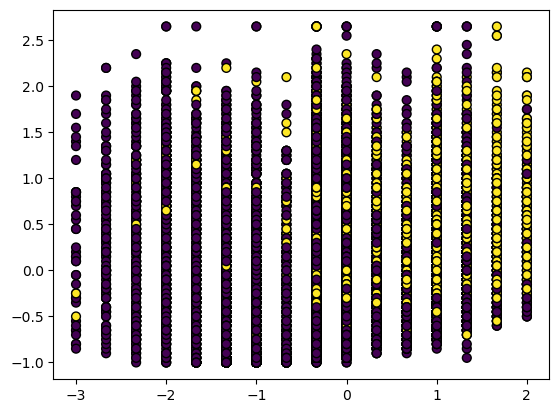

In [75]:
y_pred_train = LabelEncoder().fit_transform(y_pred_train)
plt.scatter(X_train.educational_num, X_train.age, marker="o", c=y_pred_train, s=40, edgecolor="k")
plt.show()

*Класи*

## Пояснення результатів

### Отже, кінцева точність 0.8062, перевірка з нульовою точністю показує результат 0.7631, а тому модель показує гарну роботу у прогнозуванні класів. Також різниця точності на тренувальному та тестовому датасетах мізерна, а тому модель не оверфітить та не андерфітить.

### З результатів матриці невідповідностей можна визначити, що точність у прогнузуванні, людей, які заробляють менше 50-ти тисяч, досить висока і складає 0.94, для більше 50-ти тисяч - це 0.56. Цікавим фактом є те, що зарплатня позитовно корелює зі статтю та та ступенем освіченості індивіда. У той час як подружжя та стосунки негативно корелюють, бо гроші витрачаються на дітей та партнерів. Також запрлатня мізерно корелює із расою.

### Щодо сенсативності, то вона теж досить висока 0.8 та 0.82, що вказує на те, що відношення правильно спрогнозованих значень є високою.